Getting excited about zeroing in on an improved portfolio.
It's only slightly different from GoldenButterfly, but in ways that I like:
 - 20% TSM
 - 20% SCV
 - 10% LTT  (I like this reduced exposure to LTT)
 - 20% STT
 - 15% REIT (I like the exposure to REIT, seems like a workhorse)
 - 15% GLD  (I like the slightly reduced exposure to GLD, who knows if Bitcoin is going to replace it in portfolios)

Additionally, I've added a new pwr5 metric, to show the perpetual withdrawal rate over a 5 year period.
I like this because 30 years is way too long to take seriously, I don't want old, exceptional behavior from the 80s/90s to juice the PWR metric.

In [1]:
import pandas as pd
import sqlite3
import seaborn as sns

# Read sqlite query results into a pandas DataFrame
def query(query):
    con = sqlite3.connect("output/portfolios_varying_percentages.sqlite")
    df = pd.read_sql_query(query, con)
    con.close()
    return df

4244


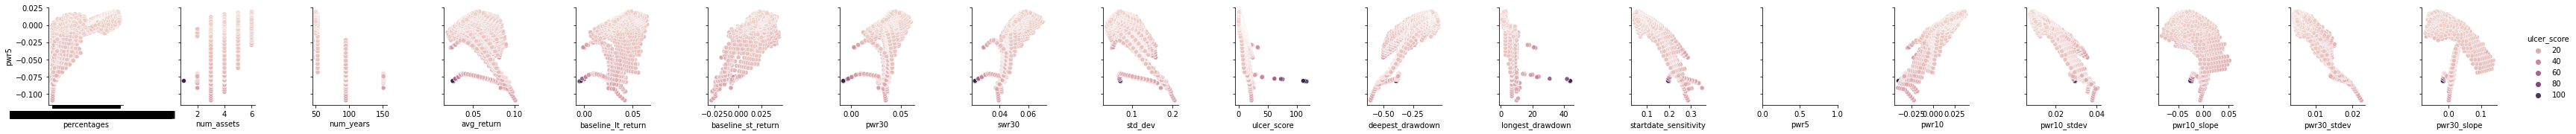

In [2]:
# get a sense of the shape of the graphs (ran with percentages in 5% steps)
df = query("""
  SELECT * FROM portfolios
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr5'], x_vars=df.columns.values[1:], hue='ulcer_score')

4244


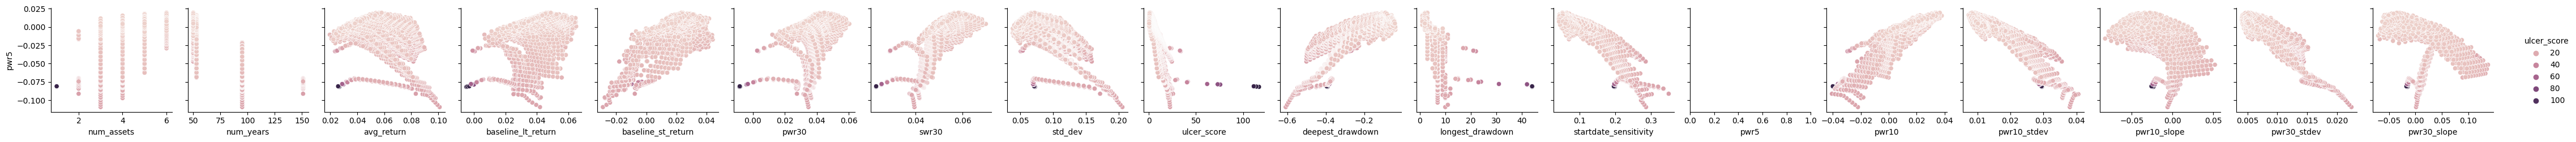

In [3]:
# get a sense of the shape of the graphs (ran with percentages in 5% steps)
df = query("""
  SELECT * FROM portfolios
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr5'], x_vars=df.columns.values[2:], hue='ulcer_score')

2998


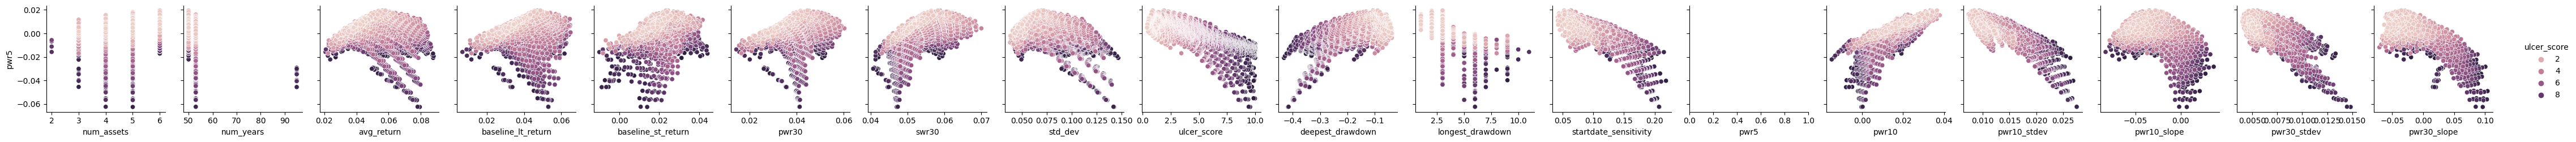

In [4]:
# tighten: ulcer_score
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr5'], x_vars=df.columns.values[2:], hue='ulcer_score')

1986


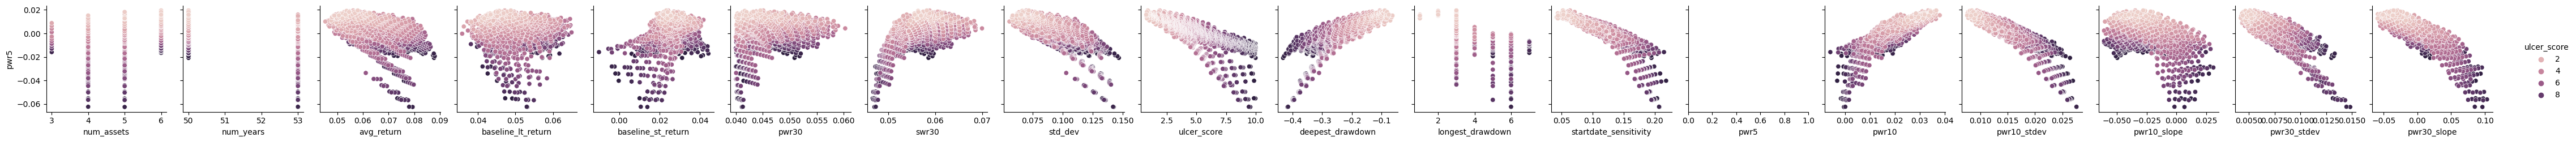

In [5]:
# tighten: pwr30
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr30 > 0.04
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr5'], x_vars=df.columns.values[2:], hue='ulcer_score')

998


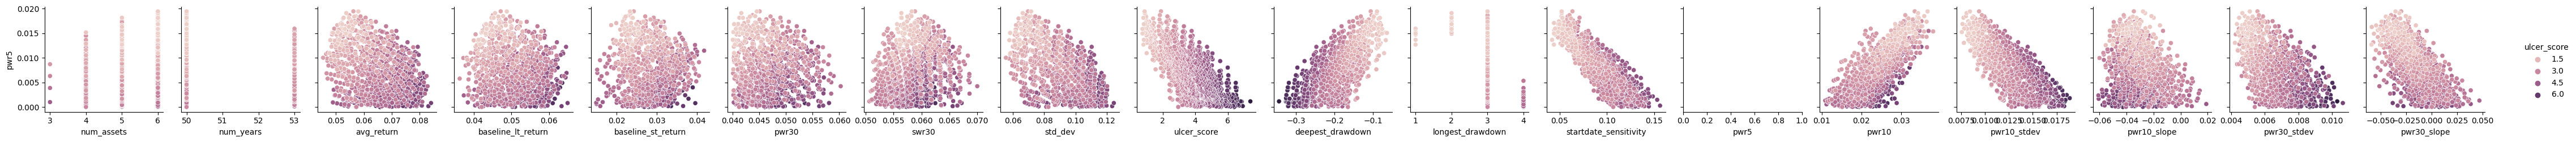

In [6]:
# tighten: pwr5
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr5 > 0
    AND pwr30 > 0.04
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr5'], x_vars=df.columns.values[2:], hue='ulcer_score')

696


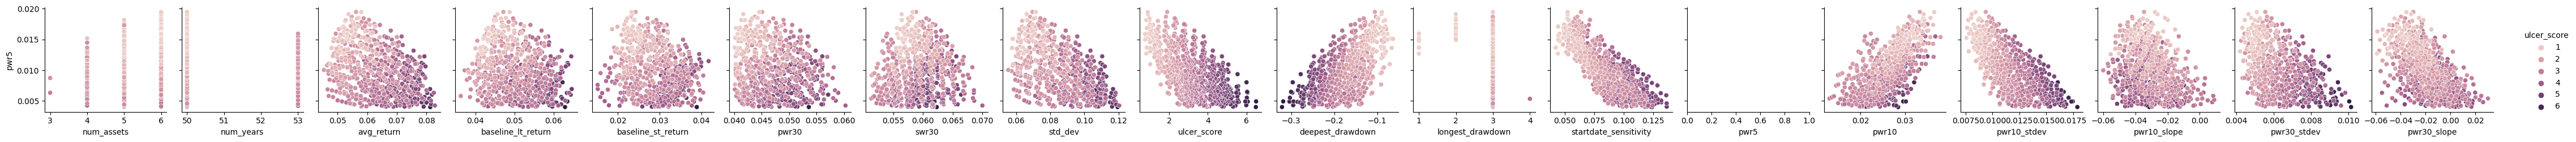

In [7]:
# tighten: pwr5
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr5 > 0.004
    AND pwr30 > 0.04
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr5'], x_vars=df.columns.values[2:], hue='ulcer_score')

200


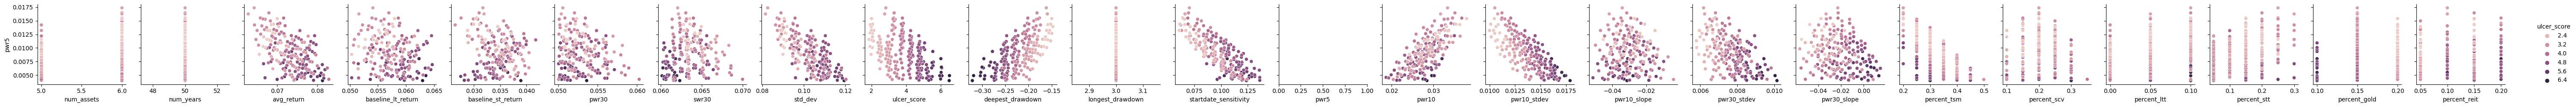

In [9]:
# loaded new data, adding new columns for percentage of each asset
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr5 > 0.004
    AND pwr30 > 0.05
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr5'], x_vars=df.columns.values[2:], hue='ulcer_score')

200


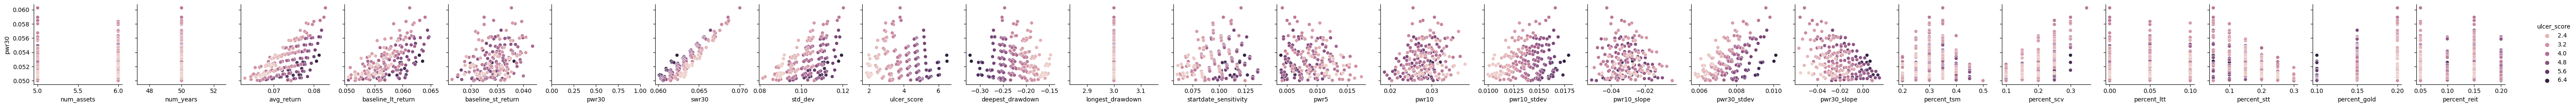

In [10]:
# try y-axis: pwr30
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr5 > 0.004
    AND pwr30 > 0.05
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr30'], x_vars=df.columns.values[2:], hue='ulcer_score')

137


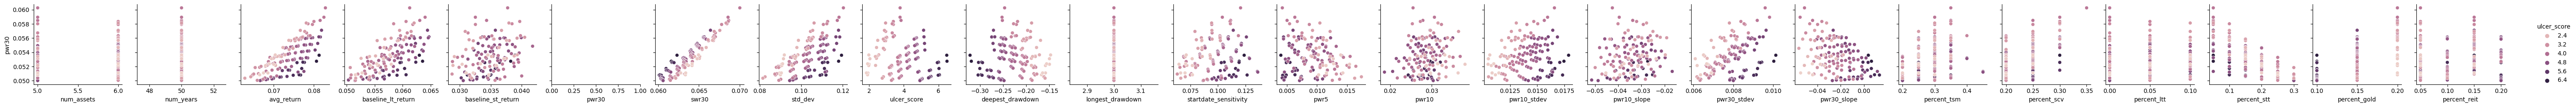

In [11]:
# must have 20% TSM, 20% SCV
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr5 > 0.004
    AND pwr30 > 0.05
    AND percent_tsm >= 0.2
    AND percent_scv >= 0.2
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr30'], x_vars=df.columns.values[2:], hue='ulcer_score')